In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
Points=[
    [x,np.sin(x)+np.random.normal(0,0.1)] for x in np.linspace(0,5,5)
]

In [123]:
def lagrange(x,Points):
    lagrange_polynomials=[]
    for k in range(len(Points)):
        l=1
        for i in range(len(Points)):
            if i!=k:
                l=l*(x-Points[i][0])/(Points[k][0]-Points[i][0])
        lagrange_polynomials.append(l)

    value=0
    for i in range(len(Points)):
        value+=lagrange_polynomials[i]*Points[i][1]
    return value

In [124]:
def aitken_neville(x,Points):
    a=np.zeros((len(Points),len(Points)))
    for i in range(len(Points)):
        a[i][0]=Points[i][1]
    for j in range(1,len(Points)):
        for i in range(len(Points)-j):
            a[i][j]=(a[i+1][j-1]*(x-Points[i][0])-a[i][j-1]*(x-Points[i+j][0]))/(Points[i+j][0]-Points[i][0])
    return a[0][len(Points)-1]

In [125]:
def newton(x,Points):
    a=np.zeros((len(Points),len(Points)))
    for i in range(len(Points)):
        a[i][0]=Points[i][1]
    for j in range(1,len(Points)):
        for i in range(len(Points)-j):
            a[i][j]=(a[i+1][j-1]-a[i][j-1])/(Points[i+j][0]-Points[i][0])
    value=0
    for i in range(len(Points)):
        product=1
        for j in range(i):
            product=product*(x-Points[j][0])
        value+=a[0][i]*product
    return value

In [126]:
x = np.linspace(-1, 6, 100)

f_lagrange = [lagrange(i,Points) for i in x]
f_aitken_neville = [aitken_neville(i,Points) for i in x]
f_newton = [newton(i,Points) for i in x]

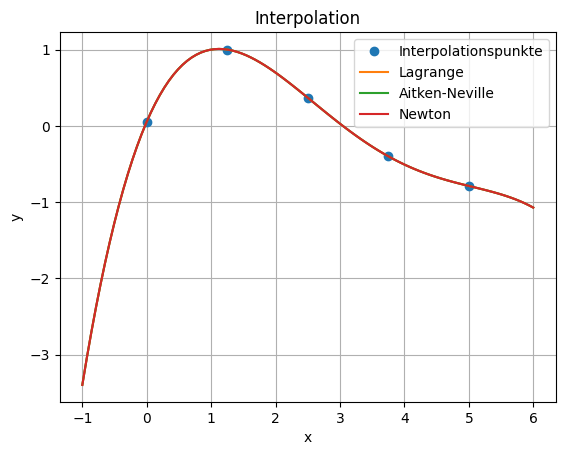

In [127]:

plt.plot([i[0] for i in Points],[i[1] for i in Points],'o')

plt.plot(x,f_lagrange)
plt.plot(x,f_aitken_neville)
plt.plot(x,f_newton)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Interpolationspunkte','Lagrange','Aitken-Neville','Newton'])
plt.grid()

plt.title('Interpolation')
plt.show()

In [128]:

plt.plot(x,gY)
plt.plot(x,condG)

plt.xlabel('x')
plt.ylabel('y')
plt.legend(['g(x)','cond(g(x))'])
plt.grid()

plt.ylim(-20,20)

plt.title('Kondition von g(x)=1/(x-2)')
plt.show()

NameError: name 'gY' is not defined

# Wichtige Stellen

Besonders Polstellen und Nullstellen der Funktion an Stellen mit $x \neq 0$ sind wichtig.
Dort kann es sein dass die Kondition sehr groß wird.